# Projeto de Análise de Dados

Este notebook faz parte de um projeto de Análise de Dados para a disciplina de Software Product: Analysis, Specification, Project do 5o semestre do curso de Análise e Desenvolvimento de Sistemas na Faculdade Impacta.

O dataset utilizado para essa análise contém informações de chamadas de emergência do condado de Montgomery, Pensilvânia, Estados Unidos, para os anos de 2016 a 2020.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

#dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

df = pd.read_csv("911.csv", 
        header=0,names=['lat', 'lng','desc','zip','title','timeStamp','twp','addr','e'],
        dtype={'lat':str,'lng':str,'desc':str,'zip':str,
                      'title':str,'timeStamp':str,'twp':str,'addr':str,'e':int}, 
         parse_dates=['timeStamp'])

df.timeStamp = pd.DatetimeIndex(df.timeStamp)
df=df[(df.timeStamp >= "2016-01-01 00:00:00")]

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
7916,40.1213543,-75.3638292,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1
7917,40.1405049,-75.3108737,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1
7918,40.2468373,-75.6813814,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1
7919,40.0972222,-75.3761952,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1
7920,40.1484317,-75.2198118,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1


In [7]:
df["title"].value_counts()

Traffic: VEHICLE ACCIDENT -    146221
Traffic: DISABLED VEHICLE -     47415
Fire: FIRE ALARM                37901
EMS: FALL VICTIM                34286
EMS: RESPIRATORY EMERGENCY      33819
                                ...  
Fire: PRISONER IN CUSTODY           1
Fire: ANIMAL COMPLAINT              1
EMS: HIT + RUN                      1
Fire: DIABETIC EMERGENCY            1
Fire: BARRICADED SUBJECT            1
Name: title, Length: 148, dtype: int64

## Dados de chamados EMS

In [8]:
# Separando o grupo de chamadas em 3 [Fire (Bombeiros), EMS (semelhante ao SAMU), e Traffic(Tráfego)]. Essa coluna será denominada type
df['type'] = df["title"].apply(lambda x: x.split(':')[0])
# Contagem do número de chamadas por tipo
df["type"].value_counts()

EMS        328794
Traffic    227285
Fire        99527
Name: type, dtype: int64

In [9]:
# Criando uma tabela apenas com os chamados de EMS chamada 'pems'
g=df[df['type'] == 'EMS' ]
pems=pd.pivot_table(g, values='e', index=['timeStamp'], columns=['title'], aggfunc=np.sum)

# Resampling para uma frequência semanal 'W'
pems=pems.resample('W').agg(np.sum)
pems.head()

title,EMS: ABDOMINAL PAINS,EMS: ACTIVE SHOOTER,EMS: ALLERGIC REACTION,EMS: ALTERED MENTAL STATUS,EMS: AMPUTATION,EMS: ANIMAL BITE,EMS: APPLIANCE FIRE,EMS: ARMED SUBJECT,EMS: ASSAULT VICTIM,EMS: BACK PAINS/INJURY,...,EMS: TRASH/DUMPSTER FIRE,EMS: UNCONSCIOUS SUBJECT,EMS: UNKNOWN MEDICAL EMERGENCY,EMS: UNKNOWN TYPE FIRE,EMS: UNRESPONSIVE SUBJECT,EMS: VEHICLE ACCIDENT,EMS: VEHICLE FIRE,EMS: VEHICLE LEAKING FUEL,EMS: WARRANT SERVICE,EMS: WOODS/FIELD FIRE
timeStamp,,,,,,,,,,,,,,,,,,,,,
2016-01-03,19.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,11.0,9.0,...,0.0,14.0,11.0,1.0,17.0,34.0,1.0,0.0,0.0,0.0
2016-01-10,43.0,0.0,8.0,46.0,0.0,2.0,1.0,0.0,19.0,23.0,...,0.0,23.0,57.0,0.0,38.0,102.0,1.0,0.0,0.0,0.0
2016-01-17,42.0,0.0,8.0,33.0,1.0,1.0,0.0,0.0,10.0,28.0,...,0.0,24.0,49.0,0.0,33.0,128.0,1.0,0.0,0.0,0.0
2016-01-24,45.0,0.0,11.0,37.0,3.0,5.0,0.0,0.0,4.0,17.0,...,0.0,24.0,51.0,0.0,44.0,85.0,0.0,0.0,0.0,0.0
2016-01-31,37.0,0.0,13.0,31.0,0.0,0.0,0.0,0.0,16.0,31.0,...,0.0,33.0,47.0,0.0,34.0,74.0,0.0,0.0,0.0,0.0


### Gráficos

In [10]:
print(pems.columns)

Index(['EMS: ABDOMINAL PAINS', 'EMS: ACTIVE SHOOTER', 'EMS: ALLERGIC REACTION',
       'EMS: ALTERED MENTAL STATUS', 'EMS: AMPUTATION', 'EMS: ANIMAL BITE',
       'EMS: APPLIANCE FIRE', 'EMS: ARMED SUBJECT', 'EMS: ASSAULT VICTIM',
       'EMS: BACK PAINS/INJURY', 'EMS: BARRICADED SUBJECT',
       'EMS: BOMB DEVICE FOUND', 'EMS: BOMB THREAT', 'EMS: BUILDING FIRE',
       'EMS: BURN VICTIM', 'EMS: CARBON MONOXIDE DETECTOR',
       'EMS: CARDIAC ARREST', 'EMS: CARDIAC EMERGENCY', 'EMS: CHOKING',
       'EMS: CVA/STROKE', 'EMS: DEBRIS/FLUIDS ON HIGHWAY', 'EMS: DEHYDRATION',
       'EMS: DIABETIC EMERGENCY', 'EMS: DISABLED VEHICLE', 'EMS: DIZZINESS',
       'EMS: DROWNING', 'EMS: ELECTRICAL FIRE OUTSIDE', 'EMS: ELECTROCUTION',
       'EMS: ELEVATOR EMERGENCY', 'EMS: EMS SPECIAL SERVICE',
       'EMS: EYE INJURY', 'EMS: FALL VICTIM', 'EMS: FEVER', 'EMS: FIRE ALARM',
       'EMS: FIRE INVESTIGATION', 'EMS: FIRE POLICE NEEDED',
       'EMS: FIRE SPECIAL SERVICE', 'EMS: FRACTURE', 'EMS: GAS-ODO

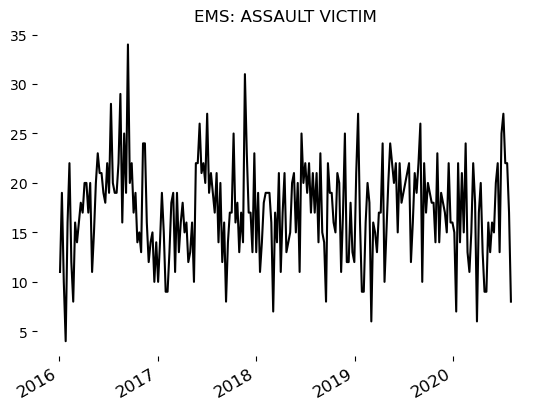

In [11]:
# Gráfico de Linha
fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  



ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 



ax.plot_date(pems.index, pems['EMS: ASSAULT VICTIM'],'k')


ax.set_title("EMS: ASSAULT VICTIM")
fig.autofmt_xdate()
plt.show()

O gráfico acima apresenta uma linha do tempo dos dados para os chamados de assault (agressão) divididos na frequência mensal do dataframe 'pems'. Para conseguirmos observar melhor se há uma queda ou aumento pelos anos, vamos realizar uma regressão linear no gráfico.

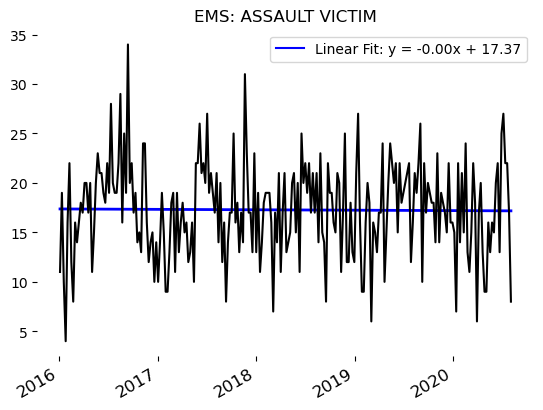

In [12]:
#Legenda
import matplotlib.lines as mlines

# For best fit line
from sklearn import linear_model

#Linha
fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  



ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 



# Build Linear Fit
Y = pems['EMS: ASSAULT VICTIM'].values.reshape(-1,1)
X=np.arange(Y.shape[0]).reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(X,Y)
m = model.coef_[0][0]
c = model.intercept_[0]
ax.plot(pems.index,model.predict(X), color='blue',
         linewidth=2)
blue_line = mlines.Line2D([], [], color='blue', label='Linear Fit: y = %2.2fx + %2.2f' % (m,c))
ax.legend(handles=[blue_line], loc='best')


ax.plot_date(pems.index, pems['EMS: ASSAULT VICTIM'],'k')


ax.set_title("EMS: ASSAULT VICTIM")
fig.autofmt_xdate()
plt.show()

A regressão linear nos mostra uma leve queda ao decorrer dos anos, mas nada muito significativo.

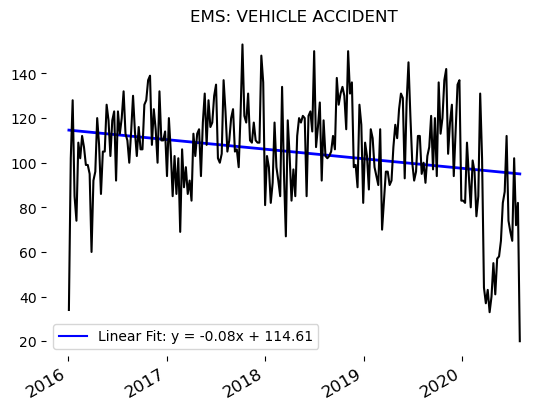

In [13]:
# Gráfico de Linha
fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  



ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 

# Construindo a regressão linear
Y = pems['EMS: VEHICLE ACCIDENT'].values.reshape(-1,1)
X=np.arange(Y.shape[0]).reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(X,Y)
m = model.coef_[0][0]
c = model.intercept_[0]
ax.plot(pems.index,model.predict(X), color='blue',
         linewidth=2)
blue_line = mlines.Line2D([], [], color='blue', label='Linear Fit: y = %2.2fx + %2.2f' % (m,c))
ax.legend(handles=[blue_line], loc='best')


ax.plot_date(pems.index, pems['EMS: VEHICLE ACCIDENT'],'k')


ax.set_title("EMS: VEHICLE ACCIDENT")
fig.autofmt_xdate()
plt.show()

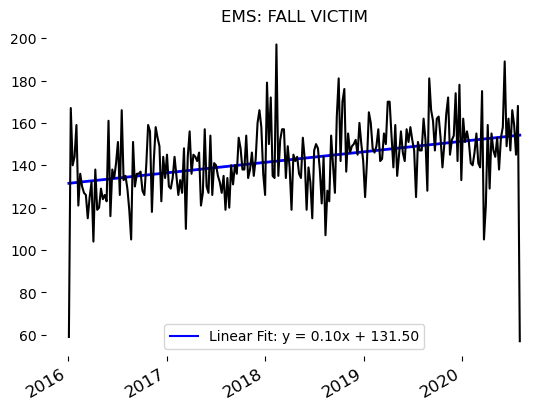

In [14]:
# Gráfico de Linha
fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  



ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 

# Construindo a regressão linear
Y = pems['EMS: FALL VICTIM'].values.reshape(-1,1)
X=np.arange(Y.shape[0]).reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(X,Y)
m = model.coef_[0][0]
c = model.intercept_[0]
ax.plot(pems.index,model.predict(X), color='blue',
         linewidth=2)
blue_line = mlines.Line2D([], [], color='blue', label='Linear Fit: y = %2.2fx + %2.2f' % (m,c))
ax.legend(handles=[blue_line], loc='best')

ax.plot_date(pems.index, pems['EMS: FALL VICTIM'],'k')


ax.set_title("EMS: FALL VICTIM")
fig.autofmt_xdate()
plt.show()

Como podemos observar nos dois gráficos acima, para os casos de "Vehicle Acident" ('Acidente Veicular') a tendência foi de uma queda ao decorrer do tempo e para os casos de "Fall Victim" ('Vitima de Queda') houve um leve aumento que parece continuar. É importante notar que os outliers do início e do começo dos gráficos, principalmente do de "Fall Victim" se dão pelas semanas com dados incompletos (a semana inicial e final).

## Mapas de Calor

In [17]:
#Filtrando as linhas do dataframe que sejam de Acidente Veicular, seja de EMS, Traffic ou FIRE
g = df[(df.title.str.match(r'EMS:.*VEHICLE ACCIDENT.*') | df.title.str.match(r'Traffic:.*VEHICLE ACCIDENT.*') | df.title.str.match(r'FIRE:.*VEHICLE ACCIDENT.*'))]
g['Month'] = g['timeStamp'].apply(lambda x: x.strftime('%m %B'))
g['Hour'] = g['timeStamp'].apply(lambda x: x.strftime('%H'))
p=pd.pivot_table(g, values='e', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p.head()

Hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
01 January,163,124,126,114,111,174,583,933,1156,776,...,1018,1163,1183,1544,1128,695,499,439,297,233
02 February,149,147,103,80,78,207,454,871,853,749,...,912,1111,1072,1063,1010,741,453,358,260,268
03 March,172,152,142,98,110,155,408,758,844,775,...,1072,1216,1293,1216,811,686,511,413,299,231
04 April,147,84,111,79,106,123,322,680,747,644,...,987,1110,1210,1100,795,428,413,321,246,185
05 May,171,142,102,103,92,147,379,771,861,751,...,1119,1316,1391,1353,893,528,474,445,312,267


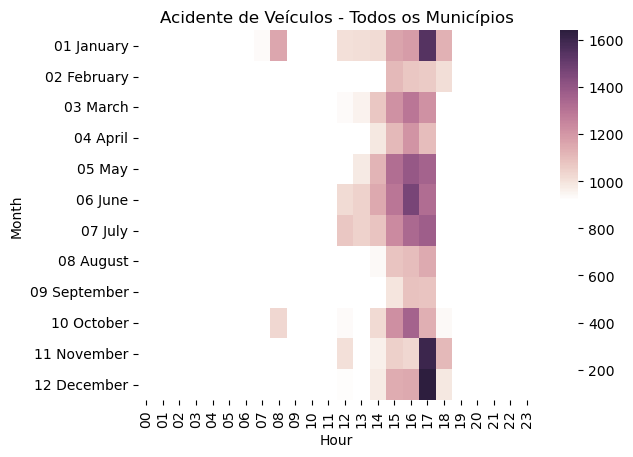

In [19]:
cmap = sns.cubehelix_palette(light=2, as_cmap=True)
ax = sns.heatmap(p,cmap = cmap)
ax.set_title('Acidente de Veículos - Todos os Municípios');

O mapa de calor acima mostra que o maior número de acidentes ocorre no período da tarde, entre as horas das 15 até as 18, provavelmente devido ao horário de pico e maior circulação de veículos nesses horários. É tammbém nos meses de verão que eles se concentram, o que pode ser explicado pelo alto índice de chuvas no período.

In [21]:
#Filtrando as linhas do dataframe que sejam de Emergências Respiratórias
g = df[(df.title.str.match(r'EMS:.*RESPIRATORY EMERGENCY.*'))]
g['Month'] = g['timeStamp'].apply(lambda x: x.strftime('%m %B'))
g['Hour'] = g['timeStamp'].apply(lambda x: x.strftime('%H'))
p=pd.pivot_table(g, values='e', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p.head()

Hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
01 January,114,97,121,88,94,94,109,131,183,233,...,178,174,151,164,161,159,147,121,112,131
02 February,82,86,83,77,75,73,110,132,194,177,...,176,144,148,137,128,129,125,128,132,97
03 March,107,93,80,91,90,97,98,120,174,185,...,157,152,159,157,139,178,157,150,113,102
04 April,89,98,78,82,76,83,99,127,141,206,...,180,158,142,149,152,127,138,140,134,101
05 May,90,88,80,80,84,86,108,124,138,178,...,166,176,140,132,130,134,166,103,109,99


Text(0.5, 1.0, 'Emergências Respiratorias - Todos os municípios')

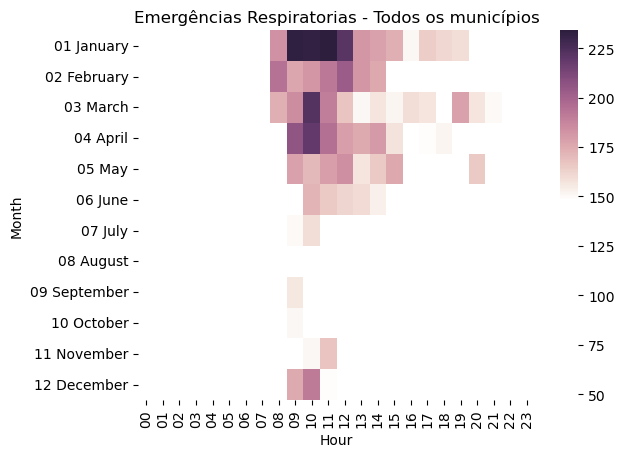

In [35]:
cmap = sns.cubehelix_palette(light=2, as_cmap=True)
ax = sns.heatmap(p,cmap = cmap)
ax.set_title('Emergências Respiratorias - Todos os municípios')

Já as emergências respiratórias se concentram principalmente nos meses de Janeiro a Abril, englobando parte do Inverno e da Primavera, onde ocorrências de doenças respiratórias são mais comuns, seja pela época de frio ou a liberação de pólen.

## Bar Plot

In [46]:
#Criando um dataframe com uma nova coluna, 'season', que vai indicar a estação do ano para cada linha
ds = pd.DataFrame(df)
# Definindo a função para mapear os meses e as estações
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Adicionando a coluna nova
ds['season'] = ds['timeStamp'].dt.month.apply(get_season)

ds.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type,season
7916,40.1213543,-75.3638292,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,Winter
7917,40.1405049,-75.3108737,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,Winter
7918,40.2468373,-75.6813814,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,Winter
7919,40.0972222,-75.3761952,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,Winter
7920,40.1484317,-75.2198118,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,Winter


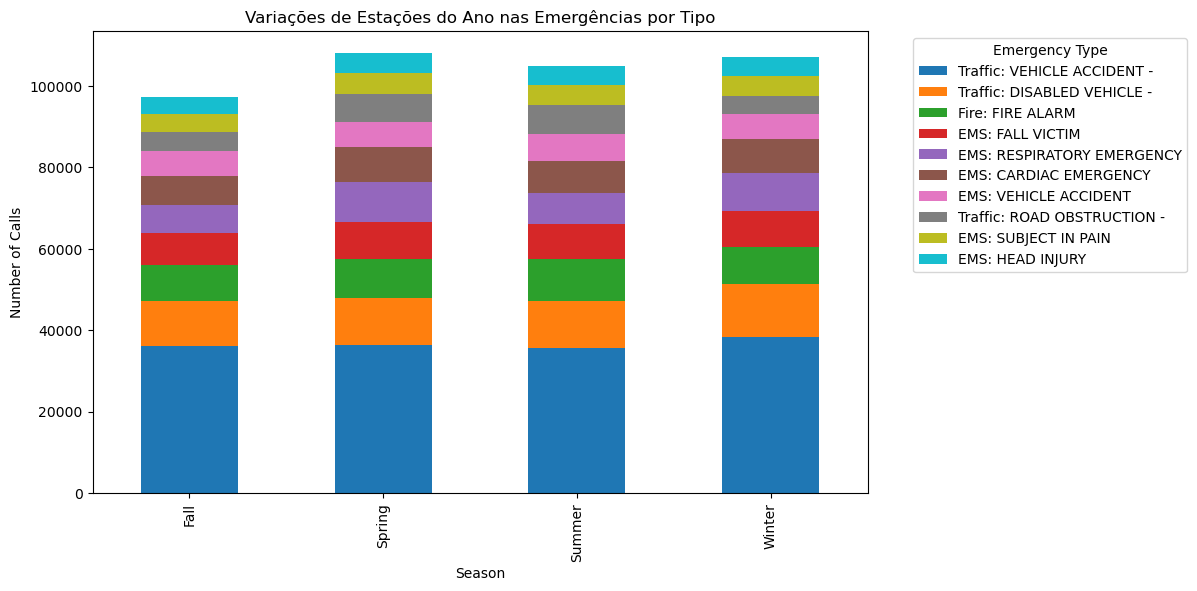

In [66]:

seasonal_emergency_counts = ds.groupby(['season', 'title']).size().unstack().fillna(0)

# Select the top 10 emergency types
top_10_overall = seasonal_emergency_counts.sum().nlargest(10)

# Filter the DataFrame to include only the top 10 emergency types
seasonal_emergency_counts = seasonal_emergency_counts[top_10_overall.index]

# Create a grouped bar plot
seasonal_emergency_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Season')
plt.ylabel('Number of Calls')
plt.title('Variações de Estações do Ano nas Emergências por Tipo')
plt.legend(title='Emergency Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

No gráfico de barras acima, as emergências estão agrupadas de acordo com a Estação de Ano de sua ocorrência. É possível visualizar que no Primavera (Spring) é onde há um maior número de emergências, seguido pelo Inverno (Winter). Quanto aos tipos de emergência, eles se mantém relativamente estáveis ao longo das estações, com alguns casso como Emergências Respiratórias ocorrendo mais na Primavera e Inverno, como já constatado anteriormente, veículos Desabilitados também parece ocorrer mais no Inverno.